# CSMODEL MCO Jupyter Notebook - Phase 1
Akbayan Partylist: Encarguez, Jorenie T. | Filipino, Audric Justin P. | Sy, Vaughn Marick A. | Valdez, Pulvert Gerald 

# Data Set Description
This data set contains student performance in secondary education in two Portuguese schools. The two datasets regarding performances are Mathematics and Portuguese and it was collected through school reports and questionnaires. Due to the data collection method, insights from the data can be affected by limited generability and self-reported bias.

There are a total of **`1044`** observations across the two datasets, there are **`395`** observations on **`Maths.csv`** and **`649`** observations on **`Portuguese.csv`** across 33 variables.

- **`school`**:	student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- **`sex`**:	student's sex (binary: 'F' - female or 'M' - male)
- **`age`**:	student's age (numeric: from 15 to 22)
- **`address`**:	student's home address type (binary: 'U' - urban or 'R' - rural)
- **`famsize`**:	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **`Pstatus`**:	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **`Medu`**:	mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **`Fedu`**:	father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **`Mjob`**:	mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **`Fjob`**:	father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **`reason`**:	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **`guardian`**:	student's guardian (nominal: 'mother', 'father' or 'other')
- **`traveltime`**:	home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **`studytime`**:	weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **`failures`**:	number of past class failures (numeric: n if 1<=n<3, else 4)
- **`schoolsup`**:	extra educational support (binary: yes or no)
- **`famsup`**:	family educational support (binary: yes or no)
- **`paid`**:	extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **`activities`**:	extra-curricular activities (binary: yes or no)
- **`nursery`**:	attended nursery school (binary: yes or no)
- **`higher`**:	wants to take higher education (binary: yes or no)
- **`internet`**:	Internet access at home (binary: yes or no)
- **`romantic`**:	with a romantic relationship (binary: yes or no)
- **`famrel`**:	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **`freetime`**:	free time after school (numeric: from 1 - very low to 5 - very high)
- **`goout`**:	going out with friends (numeric: from 1 - very low to 5 - very high)
- **`Dalc`**:	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **`Walc`**:	weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **`health`**:	current health status (numeric: from 1 - very bad to 5 - very good)
- **`absences`**:	number of school absences (numeric: from 0 to 93)
- **`G1`**:	first period grade (numeric: from 0 to 20)
- **`G2`**:	second period grade (numeric: from 0 to 20)
- **`G3`**:	final grade (numeric: from 0 to 20, output target)

-- **`G1`**, **`G2`**, and **`G3`** are grades of the student over a school year.

Another column is added depending on the origin of the dataframe which brings it to 34 variables on the merged dataframe. 
- **`subject`**: subject of the dataframe (binary: maths or portuguese)

# Import Libraries

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 

sns.set_theme(style="darkgrid")
%matplotlib inline

# Data Cleaning

First, we load and show the head's of the datasets to gain an insight on the structure.

In [191]:
maths_df = pd.read_csv('Maths.csv')
maths_df.info()
maths_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [192]:
portu_df = pd.read_csv('Portuguese.csv')
portu_df.info()
portu_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Since we are analysing the entirety of the student population, it is ideal to be able to track which dataframe did the row come from when it is eventually merged.

In [193]:
maths_df['subject'] = 'maths'
portu_df['subject'] = 'portuguese'

Upon initial inspection of **`Maths.csv`** and **`Portuguese.csv`**, the data appears to be consistently and properly represented. However,  it's important to perform due diligence to catch any issues that may not be immediately visible.

In [194]:
expected_values = {
    'school': {'gp', 'ms'},
    'sex': {'f', 'm'},
    'address': {'u', 'r'},
    'famsize': {'le3', 'gt3'},
    'pstatus': {'t', 'a'},
    'medu': set(range(0, 5)),
    'fedu': set(range(0, 5)),
    'mjob': {'teacher', 'health', 'services', 'at_home', 'other'},
    'fjob': {'teacher', 'health', 'services', 'at_home', 'other'},
    'reason': {'home', 'reputation', 'course', 'other'},
    'guardian': {'mother', 'father', 'other'},
    'traveltime': set(range(1, 5)),
    'studytime': set(range(1, 5)),
    'failures': {0, 1, 2, 4},
    'schoolsup': {'yes', 'no'},
    'famsup': {'yes', 'no'},
    'paid': {'yes', 'no'},
    'activities': {'yes', 'no'},
    'nursery': {'yes', 'no'},
    'higher': {'yes', 'no'},
    'internet': {'yes', 'no'},
    'romantic': {'yes', 'no'},
    'famrel': set(range(1, 6)),
    'freetime': set(range(1, 6)),
    'goout': set(range(1, 6)),
    'dalc': set(range(1, 6)),
    'walc': set(range(1, 6)),
    'health': set(range(1, 6)),
    'absences': set(range(0, 94)),
    'g1': set(range(0, 21)),
    'g2': set(range(0, 21)),
    'g3': set(range(0, 21)),
    'subject': {'maths', 'portuguese'}
}

def clean_strings(df):
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].str.strip().str.lower()
    return df

def clean_numeric(df):
    numeric_cols = [
        'age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
        'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health',
        'absences', 'g1', 'g2', 'g3'
    ]
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def check_values(df):
    invalid_values = {}
    for col, valid_set in expected_values.items():
        if col in df.columns:
            invalid = set(df[col].dropna().unique()) - valid_set
            if invalid:
                invalid_values[col] = invalid
    return invalid_values

In the code above, multiple data representation and correct values is being tested and checked, while further cleaning after if necessary.

In [195]:
maths_df = clean_strings(maths_df)
maths_df = clean_numeric(maths_df)

portu_df = clean_strings(portu_df)
portu_df = clean_numeric(portu_df)

maths_invalid = check_values(maths_df)
portu_invalid = check_values(portu_df)

if maths_invalid:
    print("Invalid values in math dataset:", maths_invalid)
else:
    print("Math dataset is clean.")

if portu_invalid:
    print("Invalid values in portuguese dataset:", portu_invalid)
else:
    print("Portuguese dataset is clean.")

Invalid values in math dataset: {'failures': {np.int64(3)}}
Invalid values in portuguese dataset: {'failures': {np.int64(3)}}


As seen above, there are incorrect values. Based on the attribute description, "**`failures`**:	number of past class failures (numeric: n if 1<=n<3, else 4)", 0 and 3 should never appear as a value. We shall clean that in two ways, the 0 shall be an allowed value as a student can realistically have no past failures and 3 shall be converted to 4. We shall then run the cleaner again to ensure that the categorical and numerical values are as intended.

In [196]:
maths_df['failures'] = maths_df['failures'].apply(lambda x: x if x in [0, 1, 2] else 4)
portu_df['failures'] = portu_df['failures'].apply(lambda x: x if x in [0, 1, 2] else 4)

In [197]:
maths_invalid = check_values(maths_df)
portu_invalid = check_values(portu_df)

if maths_invalid:
    print("Invalid values in math dataset:", maths_invalid)
else:
    print("Math dataset is clean.")

if portu_invalid:
    print("Invalid values in portuguese dataset:", portu_invalid)
else:
    print("Portuguese dataset is clean.")

Math dataset is clean.
Portuguese dataset is clean.


Next is to check the columnns of the two csv files if their attribute names are matching.

In [198]:
def check_column_names(df, df_name="DataFrame"):
    bad_columns = [col for col in df.columns if col != col.strip()]
    if bad_columns:
        print(f"{df_name} has improperly formatted column names: {bad_columns}")
    else:
        print(f"All column names in {df_name} are clean.")

check_column_names(maths_df, "Math Dataset")
check_column_names(portu_df, "Portuguese Dataset")


All column names in Math Dataset are clean.
All column names in Portuguese Dataset are clean.


We will now check incorrect data types. We expect 16 integer data types and 17 object data types from the info checked from the csv above.

In [199]:
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
                'absences', 'G1', 'G2', 'G3']

def check_numeric_as_string(df, numeric_cols):
    weird_numbers = {}
    for col in numeric_cols:
        non_numeric_type = df[col].apply(lambda x: isinstance(x, str))
        if non_numeric_type.any():
            weird_numbers[col] = df[col][non_numeric_type].unique().tolist()
    return weird_numbers

maths_check_string = check_numeric_as_string(maths_df, numeric_cols)
portu_check_string = check_numeric_as_string(portu_df, numeric_cols)

print("Numbers written as strings in Maths dataset:", maths_check_string)
print("Numbers written as strings in Portuguese dataset:", portu_check_string)

Numbers written as strings in Maths dataset: {}
Numbers written as strings in Portuguese dataset: {}


As seen above, no numbers above are written as strings. Next is to check if there are any missing values that may exist in our dataframes. 

In [200]:
def check_missing_values(df):
    missing = df.isna().sum()
    missing = missing[missing > 0]
    if missing.empty:
        print("No missing values detected.")
    else:
        print("Missing values found in columns:")
        print(missing)

check_missing_values(maths_df)
check_missing_values(portu_df)

No missing values detected.
No missing values detected.


As seen above, no missing values from the columns across our dataframes. Next is to check if there are duplicate instances of data in our dataframes.

In [201]:
maths_duplicates = maths_df[maths_df.duplicated(keep=False)]
portu_duplicates = portu_df[portu_df.duplicated(keep=False)]

print(f"Number of duplicate rows in maths dataframe: {len(maths_duplicates)}")
print(maths_duplicates)
print(f"Number of duplicate rows in portuguese dataframe: {len(portu_duplicates)}")
print(portu_duplicates)

Number of duplicate rows in maths dataframe: 0
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, subject]
Index: []

[0 rows x 34 columns]
Number of duplicate rows in portuguese dataframe: 0
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, subject]
Index: []

[0 rows x 34 columns]


It was entirely possible for there to have been duplicate data. There is no unique identifier for the record instances but after checking it was found that there are no duplicate instances, therefore it can be concluded that every record is a distinct student. Next, we will check for outliers in our dataframes. First we'll check numerical outliers then categorical outliers.

We will be using box plots for our numeric outliers. Exploratory Data Analysis will be done in this notebook so a visual using a box plot for the outlier would be useful.

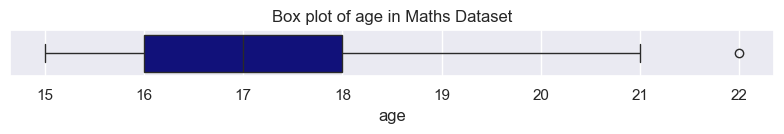

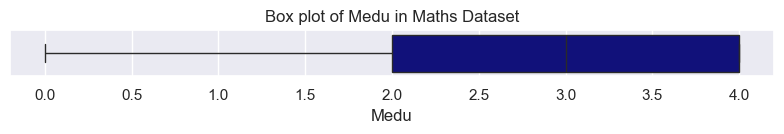

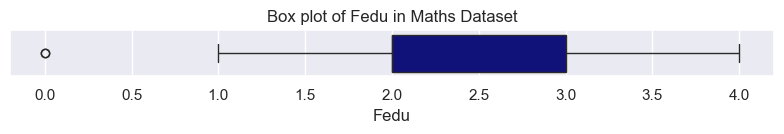

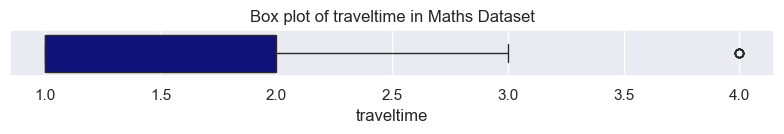

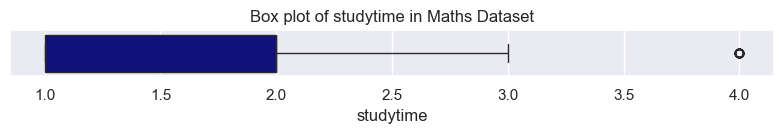

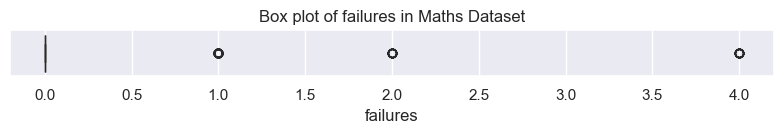

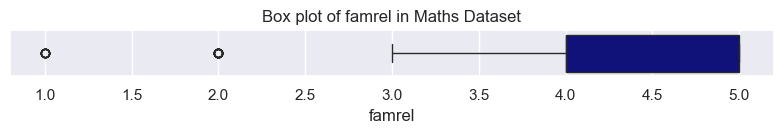

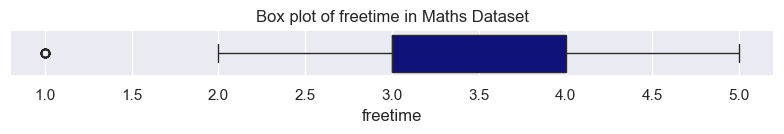

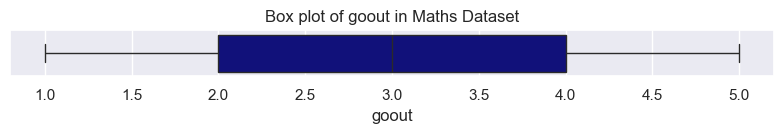

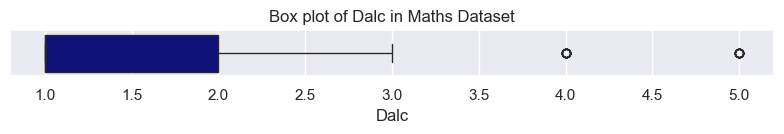

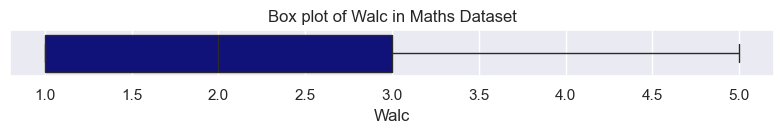

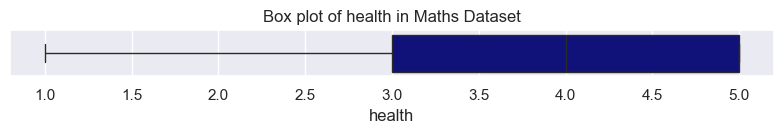

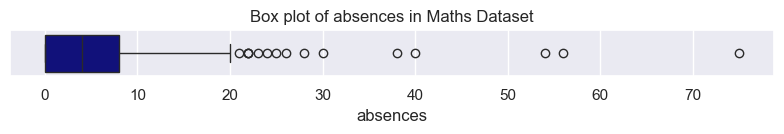

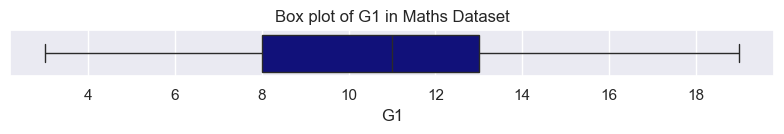

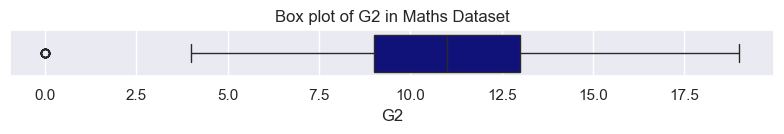

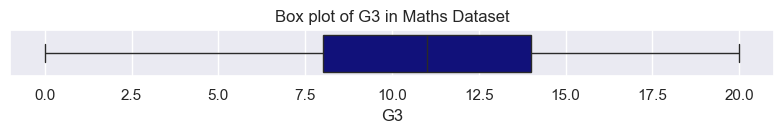

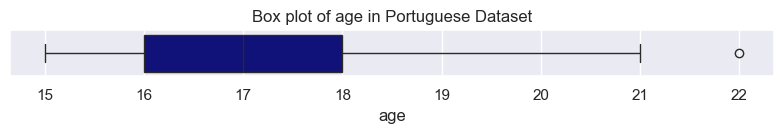

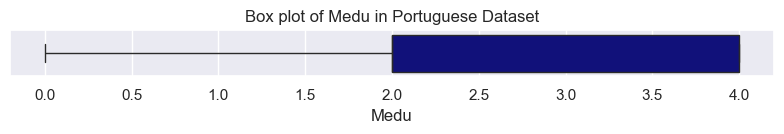

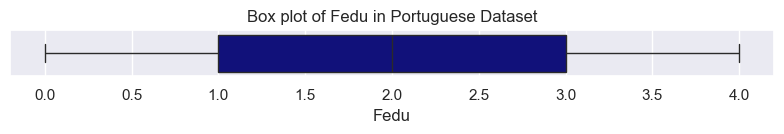

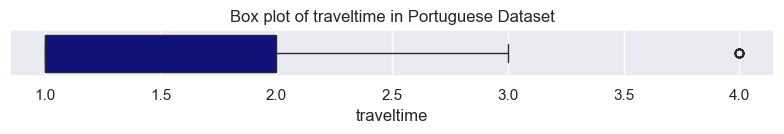

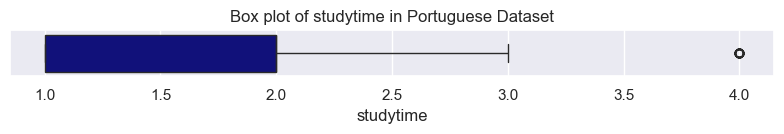

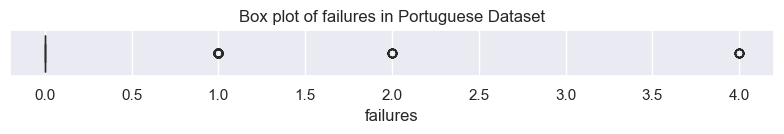

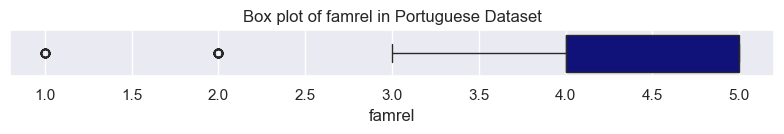

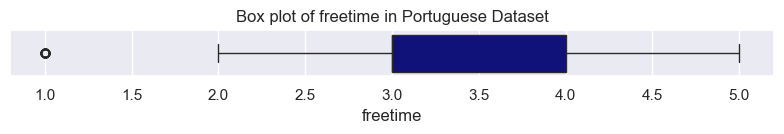

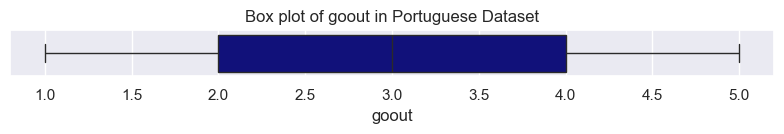

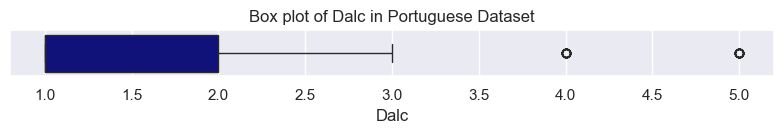

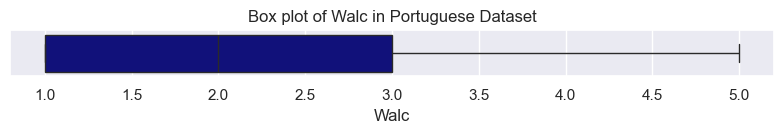

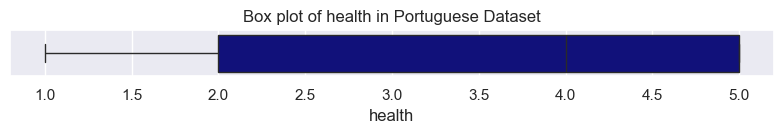

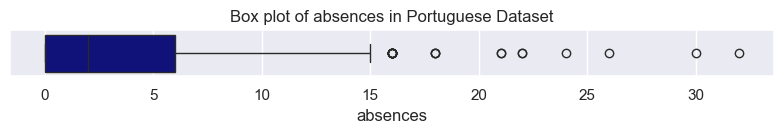

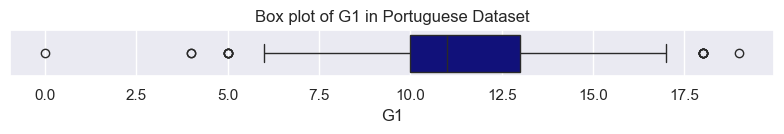

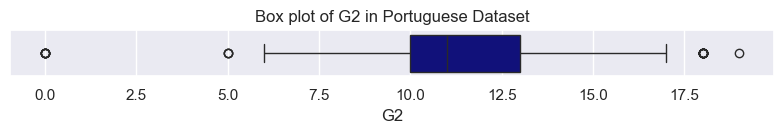

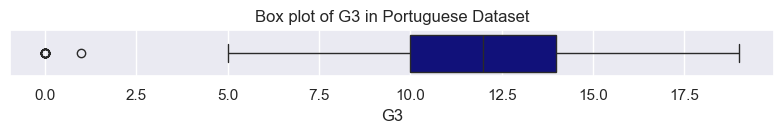

In [202]:
def plot_boxplots(df, numeric_cols, dataset_name="Dataset"):
    for col in numeric_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 1.5))
            sns.boxplot(data=df, x=col, color='darkblue')
            plt.title(f"Box plot of {col} in {dataset_name}", )
            plt.tight_layout()
            plt.show()

plot_boxplots(maths_df, numeric_cols, dataset_name="Maths Dataset")
plot_boxplots(portu_df, numeric_cols, dataset_name="Portuguese Dataset")

Below is the frequency check for the categorical outliers. We're using a table in order to have a better idea on the frequency of our data.

In [203]:
def categorical_frequency_table(df, dataset_name="Dataset"):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        freq_table = df[col].value_counts(dropna=False).reset_index()
        freq_table.columns = [col, 'count']
        print(f"Frequency table for '{col}' in {dataset_name}:")
        display(freq_table)
        print("-" * 40)

categorical_frequency_table(maths_df, dataset_name="Maths Dataset")
categorical_frequency_table(portu_df, dataset_name="Portuguese Dataset")


Frequency table for 'school' in Maths Dataset:


,school,count
0,gp,349
1,ms,46


----------------------------------------
Frequency table for 'sex' in Maths Dataset:


,sex,count
0,f,208
1,m,187


----------------------------------------
Frequency table for 'address' in Maths Dataset:


,address,count
0,u,307
1,r,88


----------------------------------------
Frequency table for 'famsize' in Maths Dataset:


,famsize,count
0,gt3,281
1,le3,114


----------------------------------------
Frequency table for 'Pstatus' in Maths Dataset:


,Pstatus,count
0,t,354
1,a,41


----------------------------------------
Frequency table for 'Mjob' in Maths Dataset:


,Mjob,count
0,other,141
1,services,103
2,at_home,59
3,teacher,58
4,health,34


----------------------------------------
Frequency table for 'Fjob' in Maths Dataset:


,Fjob,count
0,other,217
1,services,111
2,teacher,29
3,at_home,20
4,health,18


----------------------------------------
Frequency table for 'reason' in Maths Dataset:


,reason,count
0,course,145
1,home,109
2,reputation,105
3,other,36


----------------------------------------
Frequency table for 'guardian' in Maths Dataset:


,guardian,count
0,mother,273
1,father,90
2,other,32


----------------------------------------
Frequency table for 'schoolsup' in Maths Dataset:


,schoolsup,count
0,no,344
1,yes,51


----------------------------------------
Frequency table for 'famsup' in Maths Dataset:


,famsup,count
0,yes,242
1,no,153


----------------------------------------
Frequency table for 'paid' in Maths Dataset:


,paid,count
0,no,214
1,yes,181


----------------------------------------
Frequency table for 'activities' in Maths Dataset:


,activities,count
0,yes,201
1,no,194


----------------------------------------
Frequency table for 'nursery' in Maths Dataset:


,nursery,count
0,yes,314
1,no,81


----------------------------------------
Frequency table for 'higher' in Maths Dataset:


,higher,count
0,yes,375
1,no,20


----------------------------------------
Frequency table for 'internet' in Maths Dataset:


,internet,count
0,yes,329
1,no,66


----------------------------------------
Frequency table for 'romantic' in Maths Dataset:


,romantic,count
0,no,263
1,yes,132


----------------------------------------
Frequency table for 'subject' in Maths Dataset:


,subject,count
0,maths,395


----------------------------------------
Frequency table for 'school' in Portuguese Dataset:


,school,count
0,gp,423
1,ms,226


----------------------------------------
Frequency table for 'sex' in Portuguese Dataset:


,sex,count
0,f,383
1,m,266


----------------------------------------
Frequency table for 'address' in Portuguese Dataset:


,address,count
0,u,452
1,r,197


----------------------------------------
Frequency table for 'famsize' in Portuguese Dataset:


,famsize,count
0,gt3,457
1,le3,192


----------------------------------------
Frequency table for 'Pstatus' in Portuguese Dataset:


,Pstatus,count
0,t,569
1,a,80


----------------------------------------
Frequency table for 'Mjob' in Portuguese Dataset:


,Mjob,count
0,other,258
1,services,136
2,at_home,135
3,teacher,72
4,health,48


----------------------------------------
Frequency table for 'Fjob' in Portuguese Dataset:


,Fjob,count
0,other,367
1,services,181
2,at_home,42
3,teacher,36
4,health,23


----------------------------------------
Frequency table for 'reason' in Portuguese Dataset:


,reason,count
0,course,285
1,home,149
2,reputation,143
3,other,72


----------------------------------------
Frequency table for 'guardian' in Portuguese Dataset:


,guardian,count
0,mother,455
1,father,153
2,other,41


----------------------------------------
Frequency table for 'schoolsup' in Portuguese Dataset:


,schoolsup,count
0,no,581
1,yes,68


----------------------------------------
Frequency table for 'famsup' in Portuguese Dataset:


,famsup,count
0,yes,398
1,no,251


----------------------------------------
Frequency table for 'paid' in Portuguese Dataset:


,paid,count
0,no,610
1,yes,39


----------------------------------------
Frequency table for 'activities' in Portuguese Dataset:


,activities,count
0,no,334
1,yes,315


----------------------------------------
Frequency table for 'nursery' in Portuguese Dataset:


,nursery,count
0,yes,521
1,no,128


----------------------------------------
Frequency table for 'higher' in Portuguese Dataset:


,higher,count
0,yes,580
1,no,69


----------------------------------------
Frequency table for 'internet' in Portuguese Dataset:


,internet,count
0,yes,498
1,no,151


----------------------------------------
Frequency table for 'romantic' in Portuguese Dataset:


,romantic,count
0,no,410
1,yes,239


----------------------------------------
Frequency table for 'subject' in Portuguese Dataset:


,subject,count
0,portuguese,649


----------------------------------------


There are a few observations made after the box plots and frequency tables. There are a bunch of outliers in attributes failures, famrel, freetime, Dalc, absences, G1, G2, and G3. These values may indicate that it is possible that there is a relationship to be explored for our Exploratory Data Analysis portion. Meanwhile, there seems to be no extreme case of rarity on the frequency tables. 

After all theses operations on the dataframes, it is time to merge our data for the next step.

In [204]:
combined_df = pd.concat([maths_df, portu_df], ignore_index=True)
combined_df.info()
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,gp,f,18,u,gt3,a,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,maths
1,gp,f,17,u,gt3,t,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,maths
2,gp,f,15,u,le3,t,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,maths
3,gp,f,15,u,gt3,t,4,2,health,services,...,2,2,1,1,5,2,15,14,15,maths
4,gp,f,16,u,gt3,t,3,3,other,other,...,3,2,1,2,5,4,6,10,10,maths


# Research Questions & Exploratory Data Analysis

## General Research Question
### - How do academic, behavioral, and socioeconomic factors influence alcohol consumption?

The title of our dataset is "**`Alcohol Effects on Study`**", instead of building on the title and focusing on the effects of alcohol on academic performance, we switch the perspective by exploring if certain factors that are seen in this dataset influence the alcohol consumption of the students. This leads to our general research question, "**`How do academic, behavioral, and socioeconomic factors influence alcohol consumption?`**".

## Exploratory Data Analysis
Now that we have established our general research question, it is time to take into a better look into our dataset. It will be done by exploring the distributions of key variables, identifying patterns or trends, and forming specific subquestions that guide our analysis.

### Subquestions:
1. Does poorer academic performance relate to alcohol use?
2. Do students with more non-academic activities drink more?
3. Does family background relate to alcohol?

### Subquestion 1: Does poorer academic performance relate to alcohol use?

We will be using multiple tests to examine if there is a linear relationship between variables related to academic performance and alcohol consumption.

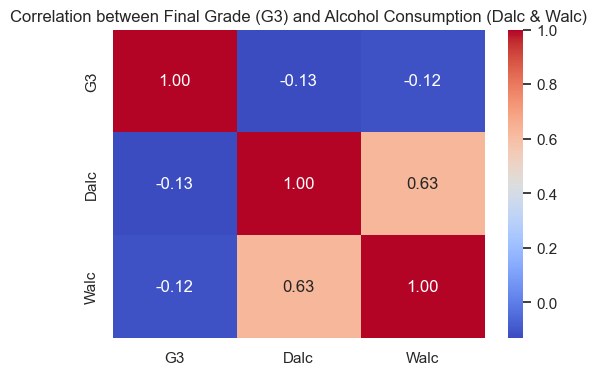

In [205]:
corr_vars = ['G3', 'Dalc', 'Walc']
corr_matrix = combined_df[corr_vars].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Final Grade (G3) and Alcohol Consumption (Dalc & Walc)")
plt.show()

From the results on the heatmap above, it shows weak negative correlations between alcohol use and final academic performance. It could suggest a slight tendency where students consume more alcohol have lower grades, the relationship however seems weak. 

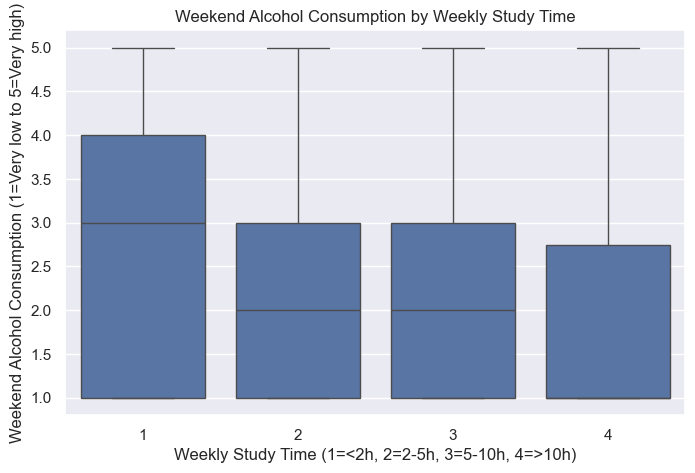

In [206]:
plt.figure(figsize=(8,5))
sns.boxplot(x='studytime', y='Walc', data=combined_df)
plt.xlabel("Weekly Study Time (1=<2h, 2=2-5h, 3=5-10h, 4=>10h)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Weekly Study Time")
plt.show()

From the results of the boxplot above, both the lower and upper whiskers are on values 1 and 5 respectively. The medians however, decrease with values 1-3 as the study time increases. The results suggest an inverse relationship between weekly study time and weekend alcohol consumption as when there is lower alcohol consumption as study time increases, conversely, alcohol consumption tends to increase as study time decreases. 

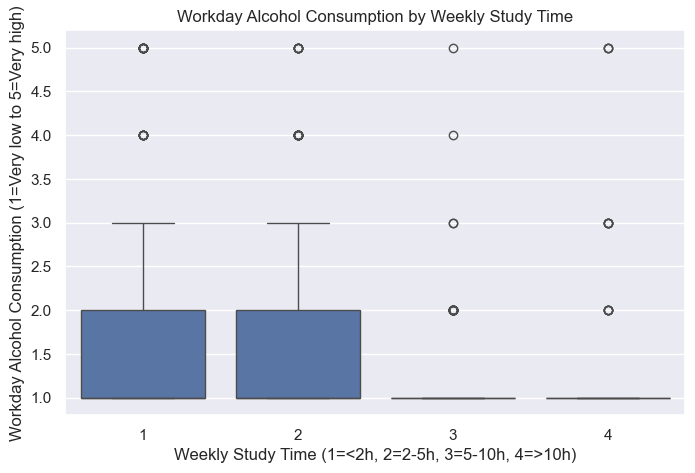

In [207]:
plt.figure(figsize=(8,5))
sns.boxplot(x='studytime', y='Dalc', data=combined_df)
plt.xlabel("Weekly Study Time (1=<2h, 2=2-5h, 3=5-10h, 4=>10h)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by Weekly Study Time")
plt.show()

From the results of the boxplot above, the upper whiskers of the students who study less are at 3 while the students who study more are at 1. The medians across the study times however are all at 1. There is a decent amount of outliers across all study times but there is a considerable amount for those who study less. The results suggest an inverse relationship between weekly study time and weekend alcohol consumption as when there is lower alcohol consumption as study time increases, conversely, alcohol consumption tends to increase as study time decreases. 

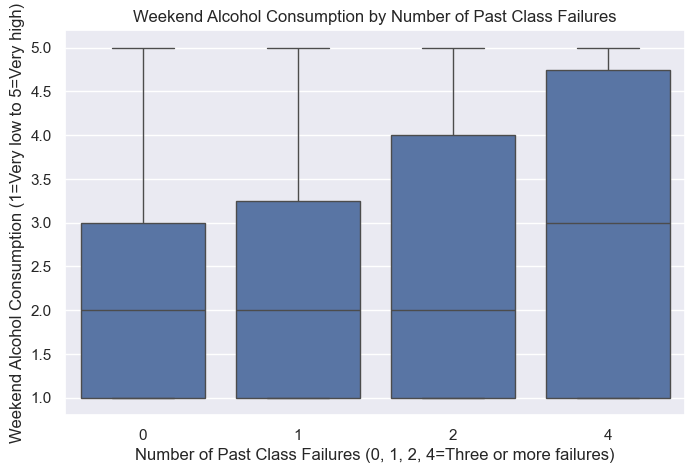

In [208]:
plt.figure(figsize=(8,5))
sns.boxplot(x='failures', y='Walc', data=combined_df)
plt.xlabel("Number of Past Class Failures (0, 1, 2, 4=Three or more failures)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Number of Past Class Failures")
plt.show()

From the results of the boxplot above, both the lower and upper whiskers are on values 1 and 5 respectively. The medians are generally at 2 with more failures at 3. The height of the quartiles, increase as the number of failures increase. The results suggest a direct relationship with the number of past class failures and the weekend alcohol consumption.

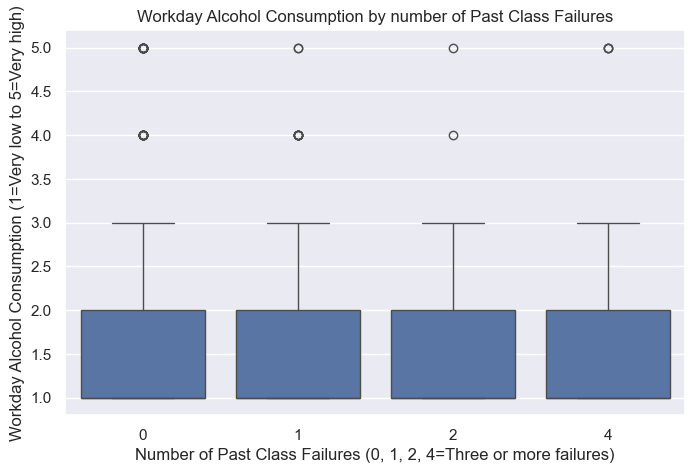

In [209]:
plt.figure(figsize=(8,5))
sns.boxplot(x='failures', y='Dalc', data=combined_df)
plt.xlabel("Number of Past Class Failures (0, 1, 2, 4=Three or more failures)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by number of Past Class Failures")
plt.show()

From the results of the boxplot above, both the lower and upper whiskers are at 1 and 3 with the median being consistently at 1. Despite the presence of outliers in areas of higher alcohol consumption, the results suggest that there is no strong relationship between the number of past class failures and workday alcohol consumption.

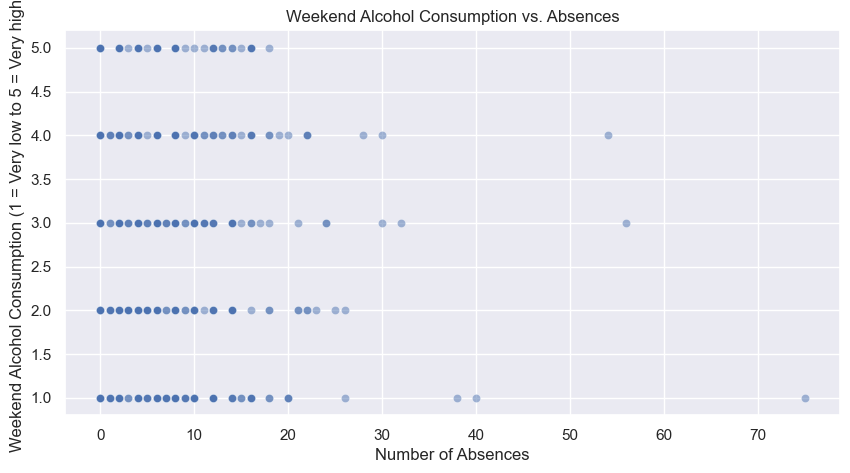

In [210]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='absences', y='Walc', data=combined_df, alpha=0.5)
plt.title("Weekend Alcohol Consumption vs. Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Weekend Alcohol Consumption (1 = Very low to 5 = Very high)")
plt.show()


From the results of the scatterplot above, the points are relatively equally spread across all number of absences and weekend alcohol consumption. Very few people who have very high absences have either low or high alcohol consumption. The results suggest that there is no strong relationship between the number of absences and the weekend alcohol consumption.

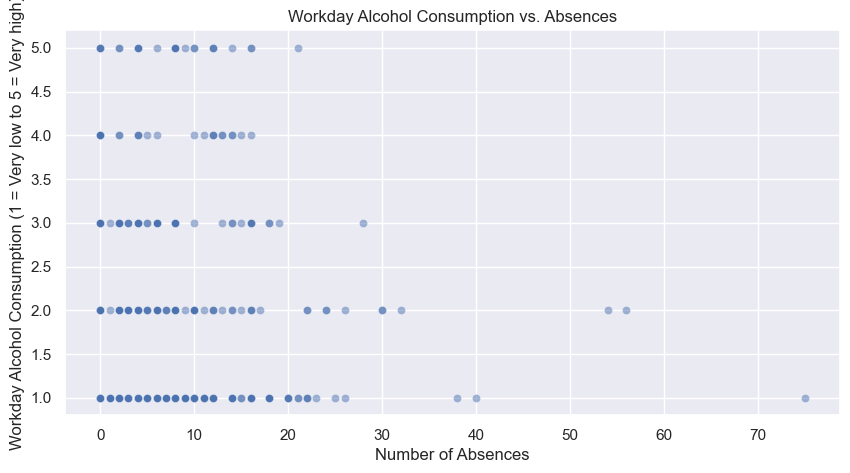

In [211]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='absences', y='Dalc', data=combined_df, alpha=0.5)
plt.title("Workday Alcohol Consumption vs. Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Workday Alcohol Consumption (1 = Very low to 5 = Very high)")
plt.show()


From the results of the scatterplot above, the points are relatively equally spread across all number of absences and wokrkday alcohol consumption. Very few people who have very high absences have either low or high alcohol consumption. The results suggest that there is no strong relationship between the number of absences and the workday alcohol consumption.

### Subquestion 2: Do students with more non-academic activities drink more? 
We will be using multiple tests to examine if there is a linear relationship between variables related to non-academic activities and alcohol consumption.

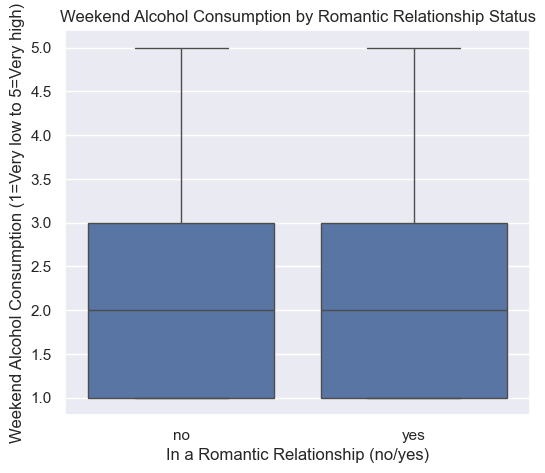

In [212]:
plt.figure(figsize=(6,5))
sns.boxplot(x='romantic', y='Walc', data=combined_df)
plt.xlabel("In a Romantic Relationship (no/yes)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Romantic Relationship Status")
plt.show()

From the results of the boxplot above, both groups display exactly the same distributions. The lower and upper whiskers are at 1 and 5 respectively, the median is at 2, the first quartile is at 1, and the third quartile is at 3. The results suggest that there is no influence from being in a romantic relationship on weekend alcohol consumption. 

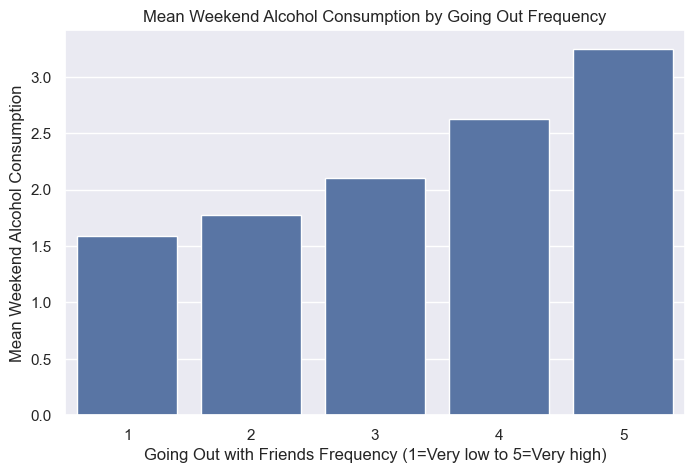

In [213]:
plt.figure(figsize=(8,5))
sns.barplot(x='goout', y='Walc', data=combined_df, errorbar=None)
plt.xlabel("Going Out with Friends Frequency (1=Very low to 5=Very high)")
plt.ylabel("Mean Weekend Alcohol Consumption")
plt.title("Mean Weekend Alcohol Consumption by Going Out Frequency")
plt.show()

From the results of the barplot above, it can be observed that as students go out more, the mean alcohol consumption increases as well, suggesting a direct relationship between the two variables. However, the means only ranges from slightly above 1.5 to just above 3.0, suggesting moderate consumption levels over all.

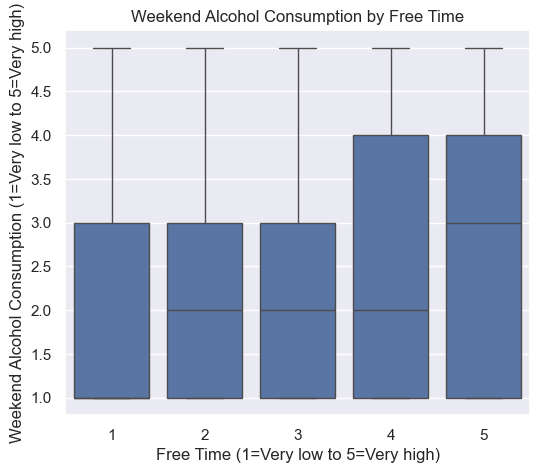

In [214]:
plt.figure(figsize=(6,5))
sns.boxplot(x='freetime', y='Walc', data=combined_df)
plt.xlabel("Free Time (1=Very low to 5=Very high)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Free Time")
plt.show()

From the results of the boxplot above, both the lower and upper whiskers are on values 1 and 5 respectively. The medians however, increase with values 1-3 as the study time increases. The results suggest an direct relationship between free time and weekend alcohol consumption as when there is higher alcohol consumption as free time increases, conversely, alcohol consumption tends to decrease as study time decreases.

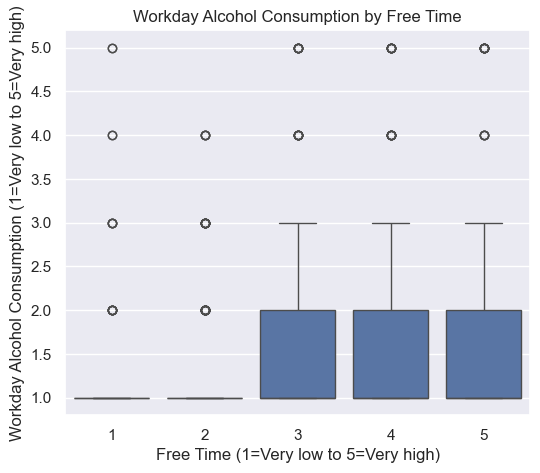

In [215]:
plt.figure(figsize=(6,5))
sns.boxplot(x='freetime', y='Dalc', data=combined_df)
plt.xlabel("Free Time (1=Very low to 5=Very high)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by Free Time")
plt.show()

From the results of the boxplot above, the upper whiskers of the students with more free time are at 3, while the median and lower whiskers for all are at 1. There is a presence of outliers of higher alcohol consumption across all levels of free time. The results suggest there is a moderate increase in alcohol consumption during workdays the higher the free time, however, the medians across all levels of free time are the same which suggests no strong relationship.

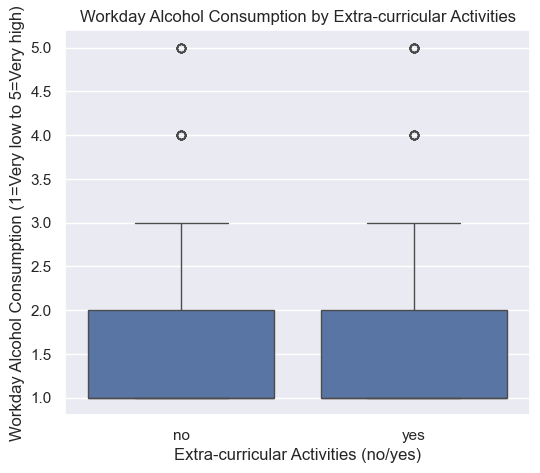

In [216]:
plt.figure(figsize=(6,5))
sns.boxplot(x='activities', y='Dalc', data=combined_df)
plt.xlabel("Extra-curricular Activities (no/yes)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by Extra-curricular Activities")
plt.show()

From the results of the boxplot above, the upper whiskers are at 3, the medians and lower whiskers are at 1, with a presence of outliers of higher alcohol consumption across both extra-curricular status. The results suggest that there is no strong relationship between extra-curricular activity status and workday alcohol consumption.

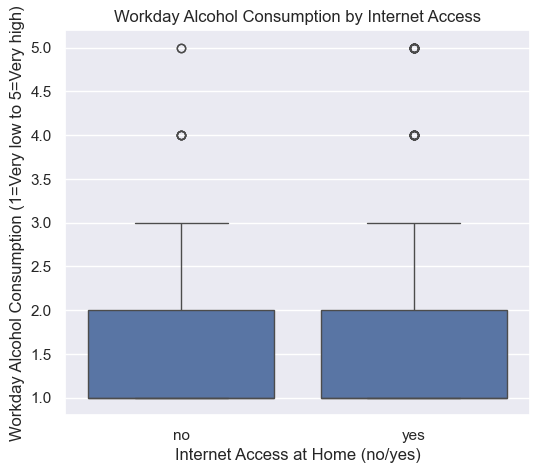

In [217]:
plt.figure(figsize=(6,5))
sns.boxplot(x='internet', y='Dalc', data=combined_df)
plt.xlabel("Internet Access at Home (no/yes)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by Internet Access")
plt.show()

From the results of the boxplot above, the upper whiskers are at 3, the medians and lower whiskers are at 1, with a presence of outliers of higher alcohol consumption across both internet status. The results suggest that there is no strong relationship between internet presence at home and workday alcohol consumption.

### Subquestion 3: Does family background relate to alcohol use?

We will be using multiple tests to examine if there is a linear relationship between variables related to family background and alcohol use. 

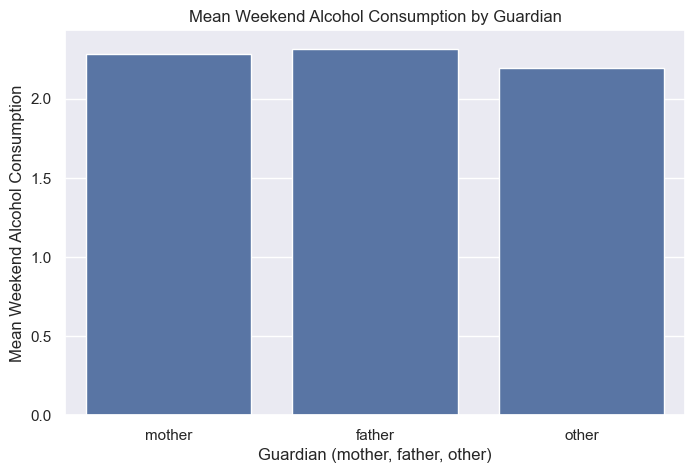

In [218]:
plt.figure(figsize=(8,5))
sns.barplot(x='guardian', y='Walc', data=combined_df, errorbar=None)
plt.xlabel("Guardian (mother, father, other)")
plt.ylabel("Mean Weekend Alcohol Consumption")
plt.title("Mean Weekend Alcohol Consumption by Guardian")
plt.show()

From the results of the barplot above, it can be observed that the means of student alcohol consumption are all slightly above 2.0, indicating moderate consumption across all kinds of guardians. This suggests that there is little to no influence by the primary guardian on workday alcohol consumption.

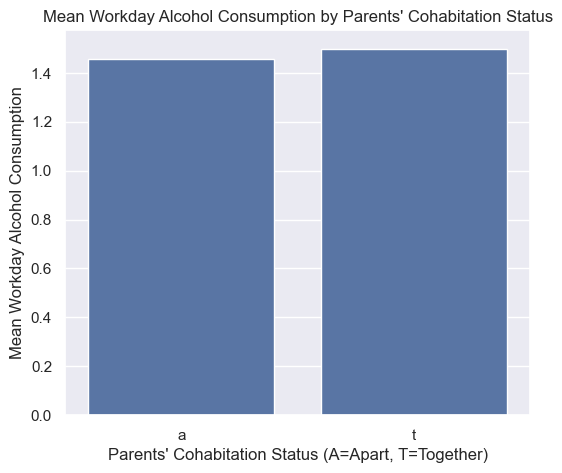

In [219]:
plt.figure(figsize=(6,5))
sns.barplot(x='Pstatus', y='Dalc', data=combined_df, errorbar=None)
plt.xlabel("Parents' Cohabitation Status (A=Apart, T=Together)")
plt.ylabel("Mean Workday Alcohol Consumption")
plt.title("Mean Workday Alcohol Consumption by Parents' Cohabitation Status")
plt.show()


From the results of the barplot above, it can be observed that the means of student alcohol consumption are all slightly above 1.4, indicating low alcohol consumption levels on both types of parental cohabitation status. This suggests that there is little to no influence by parents' cohabitation status on weekend alcohol consumption.

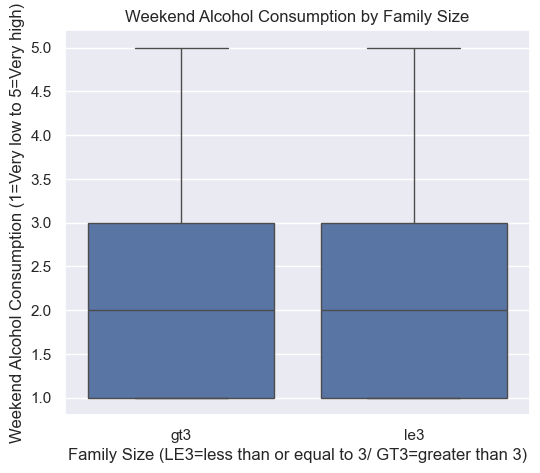

In [220]:
plt.figure(figsize=(6,5))
sns.boxplot(x='famsize', y='Walc', data=combined_df)
plt.xlabel("Family Size (LE3=less than or equal to 3/ GT3=greater than 3)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Family Size")
plt.show()

From the results of the boxplot above, the upper and lower whiskers are both at 5 and 1 respectively and the medians and quartiles of both kinds of family sizes are exactly the same. The results suggest that there is little to no influence of the family size on the weekend alcohol consumption of the students.

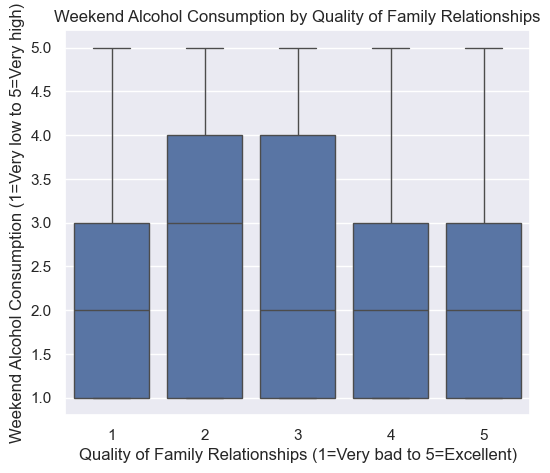

In [221]:
plt.figure(figsize=(6,5))
sns.boxplot(x='famrel', y='Walc', data=combined_df)
plt.xlabel("Quality of Family Relationships (1=Very bad to 5=Excellent)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Quality of Family Relationships")
plt.show()

From the results of the boxplot above, the upper and lower whiskers are both at 5 and 1 respectively. The medians are all at 2 with an outlier at 3. There are no visible outliers on this boxplot. The quartiles suggest similar spread of alcohol consumption across all qualities of family relationship. The results suggest that there is little to no influence of the quality of family relationships on the weekend alcohol consumption of the students. 

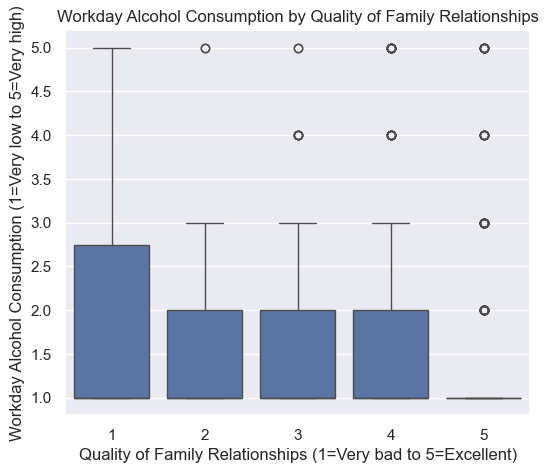

In [222]:
plt.figure(figsize=(6,5))
sns.boxplot(x='famrel', y='Dalc', data=combined_df)
plt.xlabel("Quality of Family Relationships (1=Very bad to 5=Excellent)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by Quality of Family Relationships")
plt.show()

From results of the boxplot above, the upper whiskers of the middle sections are all at 3 with a better quality of family relationships at 1 and the poorer quality of family relationships at 5. There results of these suggest that there is a possible inverse relationship between the quality of family relationships and workday alcohol consumption, where a better quality of family relationships suggest lower alcohol consumption and a poorer quality of family relationships suggest higher alcohol consumption.

### Exploratory Data Analysis Summary

Overall, the exploratory analysis reveals that weekend or workday alcohol consumption tends to be slightly higher among students who go out more frequently, study less, have poorer quality of family relationships, and have more free time, have more class failures. This suggests a direct relationship between social activity, class failures, and free time and alcohol consumption, and an inverse relationship between study time and quality of family relationships and alcohol consumption. However, no meaningful differences were observed in alcohol consumption based on the number of absences, romantic relationship status, internet access at home, extra-curricular activities, type of guardian, family size or parental cohabitation status. The findings suggests that alcohol use is more closely related to student behaviour patterns such as going out, free time, failures, or studying rather than and environment structure such as family background or relationship status, therefore partially supporting our general research question.

# Data Mining

# Statistical Inference

# Insights & Conclusions